# Open methods

The easiest way to generalize to ND is to take our 1D methods and use them as a search routine (this should sound familiar!)

NB: We have moved beyond *bounds* which are a type of constraint. We are now into *unconstrained minimization*.




Powell's method uses a starting point and some initial direction vectors. The function is optimized along each direction vector.

Subsequent direction vectors are obtained through an important observation: The line connecting the results of the previous two searchs is directed towards the minimum (i.e.: It is conjugate to the other lines).

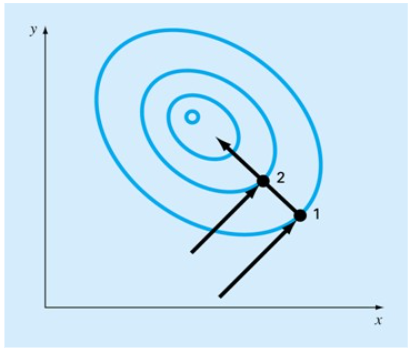

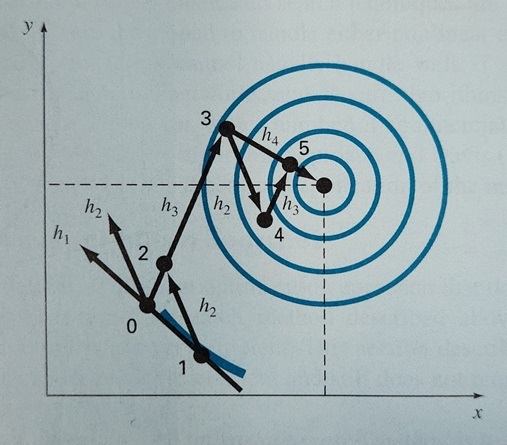

The algorithm is (Taken from Chapra and Canale - Numerical Methods for Engineers):
1. Start at 0 with directions $h_1$ and $h_2$
2. Search from 0 along $h_1$ to get to point 1.
3. Search from 1 along $h_2$ to get to 2.
4. Define $h_3$ from 0 to 2.
5. Search from 2 along $h_3$ to find 3
6. From 3, search along $h_2$ to get 4
7. From 4 search along $h_3$ to get 5.
8. Use points 5 and 3 to define $h_4$.
9. $h_3$ and $h_4$ are conjugate and therefore the solution can now be found as a combination of them.

Powell showed that this method generates conjugate directions *without needing to know anything about the function or its derivative*. Further, this method has quadratic convergence near the minimum!

#### Example: 2D optimization


In [ ]:
# prompt: Minimize a rosenbrock function with powels method, showing the guesses

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import plotly.graph_objects as go
import scipy.optimize as optimize

def rosenbrock(x):
  return ((1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2)

x0 = np.array([-1, 2.5])
result = optimize.minimize(rosenbrock, x0, method='Powell',options={'disp': True, 'return_all': True})
print('The minimum is, ', result.fun, ' found at ', result.x)
guesses = [x0]
for i in range(result.nit):
  guesses.append(result.allvecs[i])

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock([X, Y])

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.update_layout(title='Rosenbrock Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

for guess in guesses:
  fig.add_trace(go.Scatter3d(
      x=[guess[0]], y=[guess[1]], z=[rosenbrock(guess)],
      mode='markers',
      marker=dict(
          size=5,
      )
  ))
fig.show()



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 684
The minimum is,  2.0830858278492343e-30  found at  [1. 1.]


## Nelder-Mead downhill simplex (amoeba method)


The Nelder-Mead method works by moving an N-D *simplex* downhill until it surrounds a minimum, then contracts until a specified threshold is reached.

A simplex is the simplest nD polygon. For 2D this is a triangle, for 3D a tetrahedron, etc.


The algorithm proceeds identifying the 'Hi' and 'Lo' points:

1.   Reflection: Move 'Hi' *through* the opposite face, such that the volume of the simplex remains constant.  
2.   Expansion: Move 'Hi' further to increase the simplex volume.
3.   Contraction: Move 'Hi' a fraction towards the opposite face.
4.   Shrinkage: Move all verticies towards 'Lo'.



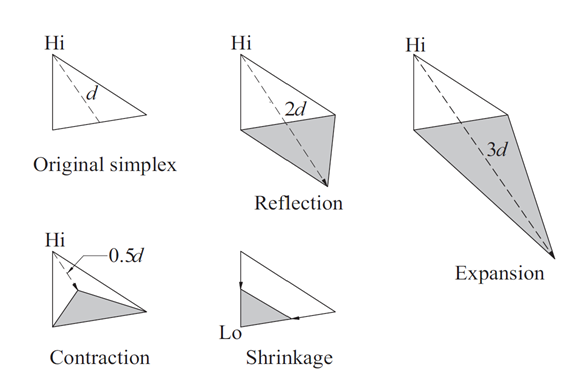

Algorithm:

```
Try reflection.
if new vertex ≤ old Lo: accept reflection
  Try expansion.
  if new vertex ≤ old Lo: accept expansion.
else:
  if new vertex > old Hi:
    Try contraction.
    if new vertex ≤ old Hi: accept contraction.
  else: use shrinkage.
```




It is sometimes known as the 'Amoeba method' since it appears to behave like a cell traversing an energy landscape.

It is much slower than Powell's method, but it is generally preferred for small dimensional problems due to its robustness.

#### Example: Nelder-Mead on the Rosenbrock function

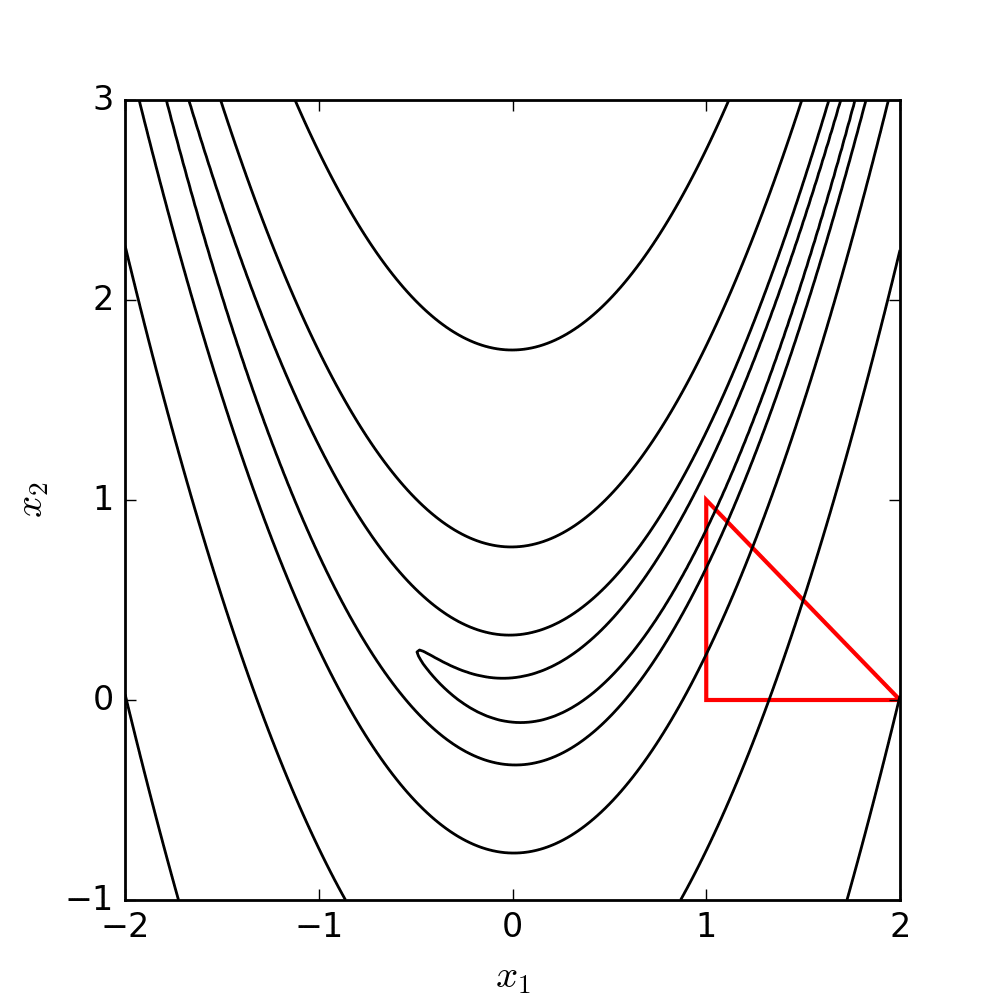

#### Example: Nelder-Mead on the Himmelblau function

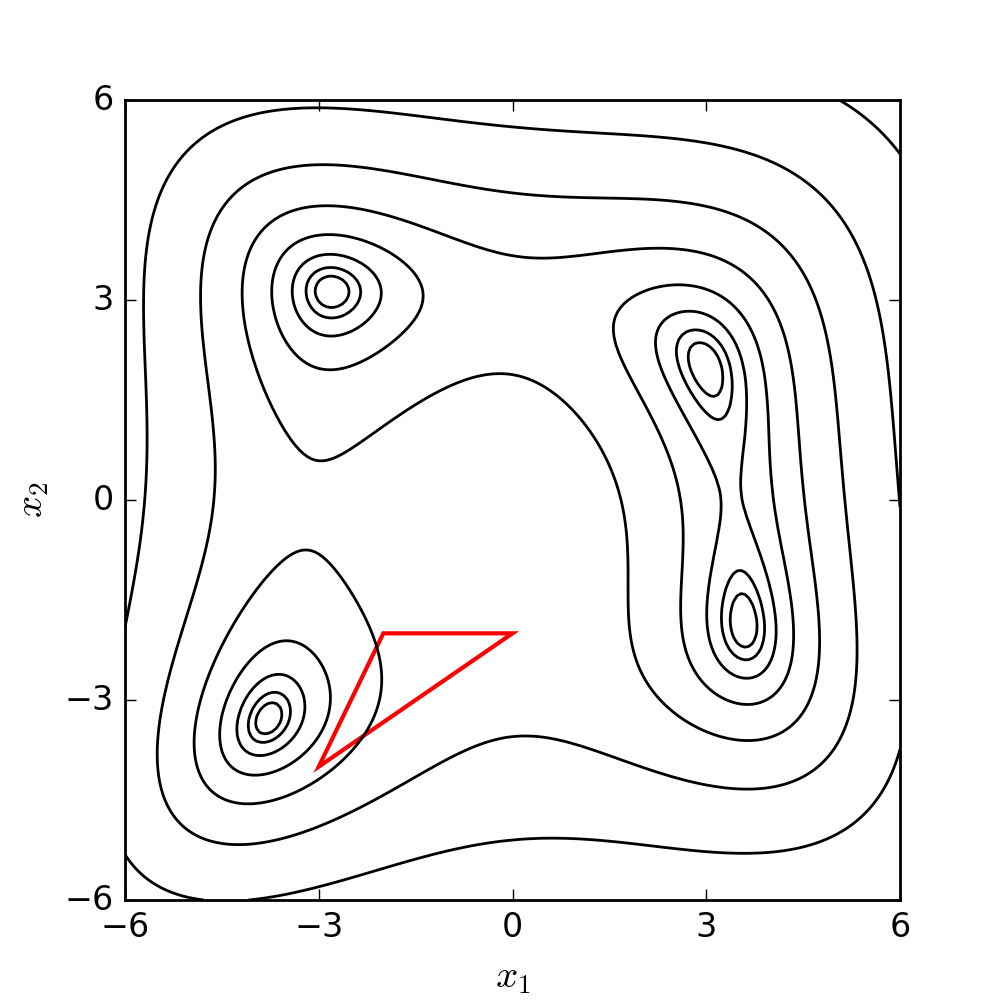